In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne, glob
import eeglabio
import pandas as pd

%matplotlib inline

In [2]:
path = 'C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy\\CleanSetFiles\\Adaptive'
os.chdir(path)

In [36]:
data = mne.io.read_raw_eeglab('6Adaptive_Clean.set')


Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\Adaptive\6Adaptive_Clean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_12716\2125307514.py:1: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab('6Adaptive_Clean.set')
C:\Users\anita\AppData\Local\Temp\ipykernel_12716\2125307514.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab('6Adaptive_Clean.set')


In [37]:
d = {'Fz': data[0][0][0], 'F3': data[1][0][0], 'Cz': data[2][0][0], 'F4': data[3][0][0], 'Pz': data[4][0][0],
     'C3': data[5][0][0], 'Oz': data[6][0][0], 'C4': data[7][0][0]}

df = pd.DataFrame(d)

In [38]:
df



,Fz,F3,Cz,F4,Pz,C3,Oz,C4
0,-4.599598,3.517471,31.674208,28.242134,-8.710960,-0.662802,1.674904,-2.465684
1,-5.317616,2.634055,30.569860,28.369374,-9.819167,-3.064772,-2.743238,-3.944366
2,-6.140347,2.192204,29.766652,28.953072,-9.901784,-4.545296,-6.087881,-4.310122
3,-6.780846,2.622412,29.828008,30.015694,-8.388006,-3.897243,-6.197553,-2.778603
4,-7.268578,3.565829,30.481164,31.340854,-5.966466,-1.869476,-4.071336,-0.120203
...,...,...,...,...,...,...,...,...
155179,0.059551,10.492160,9.463282,9.169557,2.916853,6.914084,10.979143,4.206467
155180,-3.276580,10.945047,8.880977,10.173413,4.151755,7.744536,11.186544,5.259304
155181,-5.800923,10.951031,8.014952,10.184863,4.732680,8.241724,10.835292,5.628006
155182,-7.398513,10.672917,7.093298,9.098828,4.573676,8.254358,10.011431,5.218342


In [7]:
def getEEGIndex(channel):
    epochs = []
    buffer = []
    #sample freq = 256 Hz
    #10 seconds = 2560 samples per epoch
    count = 0
    for i in range(len(channel)):
         
        buffer.append(channel[i])
        
        if count == 256:
            spectral = np.fft.fft(buffer).real
            
            alpha = np.nanmean(spectral[8:12])
            
            beta = np.nanmean(spectral[13:30])
            theta = np.nanmean(spectral[4:8])
        
            EEGIndex = beta/(alpha+theta)
            epochs.append(EEGIndex)
            count = 0
            buffer = []
            
        count += 1
        
        
        
    return epochs



In [8]:
def getEngagement(participant_df):
    channels = []
    for i in participant_df.columns:
        #print(participant_df[i])
        channels.append(getEEGIndex(participant_df[i])) 
        
    EEG_Engagement = pd.DataFrame(channels)
    EEG_Engagement = EEG_Engagement.T
    
    dcols = list(participant_df.columns)
    EEG_Engagement = EEG_Engagement.set_axis(dcols, axis=1, inplace=False)
    
    return EEG_Engagement



In [33]:
EEG_Engagement = pd.DataFrame(getEngagement(df))
EEG_Engagement

,Fz,F3,Cz,F4,Pz,C3,Oz,C4
0,0.189966,15.462902,0.143346,0.085226,0.126807,-0.218454,-2.757561,-0.054298
1,-0.205396,-0.101539,-0.178583,0.020788,3.466429,-0.722162,11.438158,0.284967
2,-0.306696,-0.206732,-0.241155,0.026962,-0.171979,-0.118157,-0.058601,-0.043767
3,-0.017251,-0.361099,-0.257064,0.002726,-0.592177,0.985617,-1.764401,0.007008
4,-0.960022,0.083721,0.125596,-0.137208,0.145571,0.129954,0.192378,0.134891
...,...,...,...,...,...,...,...,...
613,-0.122563,-8.641075,-0.354968,-0.228834,-0.244128,-0.573322,-0.463542,-0.190684
614,-0.009716,-0.128677,-0.054617,-24.932394,-0.167434,-0.263651,-0.156881,-0.063098
615,0.008365,-0.082237,-0.069357,-0.347195,0.251857,0.251345,0.339187,0.034035
616,0.619718,0.492072,0.348990,-0.074980,1.442141,-1.424954,3.999485,0.976028


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(EEG_Engagement)

EEG_Engagement[:] = scaler.transform(EEG_Engagement)
EEG_Engagement

,Fz,F3,Cz,F4,Pz,C3,Oz,C4
0,0.246649,1.000000,0.610035,0.064863,0.483834,0.609912,0.877809,0.678265
1,0.232900,0.875265,0.604166,0.064779,0.544649,0.607855,0.895263,0.679850
2,0.229377,0.874422,0.603025,0.064787,0.478394,0.610321,0.881128,0.678314
3,0.239443,0.873185,0.602735,0.064755,0.470742,0.614828,0.879030,0.678552
4,0.206657,0.876749,0.609712,0.064572,0.484176,0.611335,0.881436,0.679149
...,...,...,...,...,...,...,...,...
613,0.235781,0.806828,0.600950,0.064452,0.477080,0.608463,0.880630,0.677628
614,0.239705,0.875047,0.606426,0.032128,0.478476,0.609727,0.881007,0.678224
615,0.240334,0.875419,0.606157,0.064297,0.486112,0.611830,0.881617,0.678678
616,0.261594,0.880022,0.613785,0.064654,0.507787,0.604986,0.886117,0.683078


In [34]:
EEG_Engagement['Frontal'] = EEG_Engagement[["Fz", "F3", "F4"]].mean(axis = 1)
EEG_Engagement['Central'] = EEG_Engagement[["Cz", "C3", "C4"]].mean(axis = 1)
EEG_Engagement['Parietal'] = EEG_Engagement[["Pz", "Oz"]].mean(axis = 1)
EEG_Engagement['Total'] = EEG_Engagement.mean(axis = 1)
EEG_Engagement

,Fz,F3,Cz,F4,Pz,C3,Oz,C4,Frontal,Central,Parietal,Total
0,0.189966,15.462902,0.143346,0.085226,0.126807,-0.218454,-2.757561,-0.054298,5.246031,-0.043135,-1.315377,1.533223
1,-0.205396,-0.101539,-0.178583,0.020788,3.466429,-0.722162,11.438158,0.284967,-0.095383,-0.205259,7.452294,1.923119
2,-0.306696,-0.206732,-0.241155,0.026962,-0.171979,-0.118157,-0.058601,-0.043767,-0.162155,-0.134360,-0.115290,-0.139266
3,-0.017251,-0.361099,-0.257064,0.002726,-0.592177,0.985617,-1.764401,0.007008,-0.125208,0.245187,-1.178289,-0.277723
4,-0.960022,0.083721,0.125596,-0.137208,0.145571,0.129954,0.192378,0.134891,-0.337836,0.130147,0.168974,-0.029439
...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.122563,-8.641075,-0.354968,-0.228834,-0.244128,-0.573322,-0.463542,-0.190684,-2.997491,-0.372991,-0.353835,-1.322130
614,-0.009716,-0.128677,-0.054617,-24.932394,-0.167434,-0.263651,-0.156881,-0.063098,-8.356929,-0.127122,-0.162157,-3.129334
615,0.008365,-0.082237,-0.069357,-0.347195,0.251857,0.251345,0.339187,0.034035,-0.140356,0.072008,0.295522,0.055743
616,0.619718,0.492072,0.348990,-0.074980,1.442141,-1.424954,3.999485,0.976028,0.345603,-0.033312,2.720813,0.855600


In [35]:
EEG_Engagement.to_csv('P5_Engagement_Raw') 

Text(0.5, 1.0, 'EEG Engagement Index Different Electrodes')

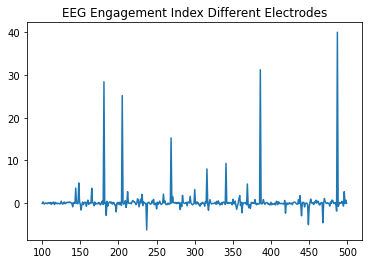

In [268]:
#plt.plot(EEG_Engagement['Frontal'])
#plt.plot(EEG_Engagement['Central'])
#plt.plot(EEG_Engagement['Parietal'])
plt.plot(EEG_Engagement['Total'][100:500])
plt.title('EEG Engagement Index Different Electrodes')


In [41]:
def createCSV(num, scaling):
    fname = str(num +'Adaptive_Clean.set')
    
    ##Read from .set files
    data = mne.io.read_raw_eeglab(fname)
    d = {'Fz': data[0][0][0], 'F3': data[1][0][0], 'Cz': data[2][0][0], 'F4': data[3][0][0], 'Pz': data[4][0][0],
         'C3': data[5][0][0], 'Oz': data[6][0][0], 'C4': data[7][0][0]}

    df = pd.DataFrame(d)
    EEG_Engagement = pd.DataFrame(getEngagement(df))

    if scaling == True:
        #Scaling yes/no
        scaler = MinMaxScaler().fit(EEG_Engagement)

        EEG_Engagement[:] = scaler.transform(EEG_Engagement)
    
    else:
        pass
    
    EEG_Engagement['Frontal'] = EEG_Engagement[["Fz", "F3", "F4"]].mean(axis = 1)
    EEG_Engagement['Central'] = EEG_Engagement[["Cz", "C3", "C4"]].mean(axis = 1)
    EEG_Engagement['Parietal'] = EEG_Engagement[["Pz", "Oz"]].mean(axis = 1)
    EEG_Engagement['Total'] = EEG_Engagement.mean(axis = 1)
        
    fname_out = str('P'+ num + 'Engagement_Raw')
    path_out = str('C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy\\CleanSetFiles\\EngagementCSV\\' + fname_out)
    EEG_Engagement.to_csv(path_out) 
    
    return "File" + num + "processed..."


In [42]:
flist = []
for i in os.listdir():
    if '.set' in i:
        flist.append(i)       
print(flist)

['10Adaptive_Clean.set', '11Adaptive_Clean.set', '12Adaptive_Clean.set', '13Adaptive_Clean.set', '14Adaptive_Clean.set', '15Adaptive_Clean.set', '16Adaptive_Clean.set', '17Adaptive_Cleaning.set', '18Adaptive_Cleaning.set', '19Adaptive_Clean.set', '1Adaptive_Clean.set', '20Adaptive_Clean.set', '21Adaptive_Clean.set', '22Adaptive_Clean.set', '23Adaptive_Clean.set', '24Adaptive_Clean.set', '25Adaptive_Clean.set', '26Adaptive_Clean.set', '27Adaptive_Clean.set', '28Adaptive_Clean.set', '29Adaptive_Clean.set', '30Adaptive_Clean.set', '31Adaptive_Clean.set', '32Adaptive_Clean.set', '33Adaptive_Clean.set', '34Adaptive_Clean.set', '35Adaptive_Clean.set', '36Adaptive_Clean.set', '37Adaptive_Clean.set', '38Adaptive_Clean.set', '39Adaptive_Clean.set', '3Adaptive_Clean.set', '40Adaptive_Clean.set', '4Adaptive_Clean.set', '5Adaptive_Clean.set', '6Adaptive_Clean.set', '7Adaptive_Clean.set', '8Adaptive_Clean.set', '9Adaptive_Clean.set']


In [44]:
for i in range(len(flist)):
    num = flist[i][0:2]
    createCSV(num, scaling = False)

Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\Adaptive\10Adaptive_Clean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\Adaptive\11Adaptive_Clean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\Adaptive\12Adaptive_Clean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\Adaptive\13Adaptive_Clean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\Adaptive\14Adaptive_Clean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\Adaptive\15Adaptive_Clean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\Adaptive\16Adaptive_Clean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_12716\4045836189.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


FileNotFoundError: input_fname does not exist: C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\Adaptive\17Adaptive_Clean.set